In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://bit.ly/3m0M6yL')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
df.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.shape

(4119, 20)

In [8]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

age
[30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]
------------------------------------------------------------
job
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['yes' 'no' 'unknown']
------------------------------------------------------------
loan
['no' 'unknown' 'yes']
------

In [9]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [10]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
df.default.replace('unknown','no',inplace=True)

In [12]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [13]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [14]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [15]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [16]:
df['y'].replace({'no':0,'yes':1},inplace=True)

<AxesSubplot:>

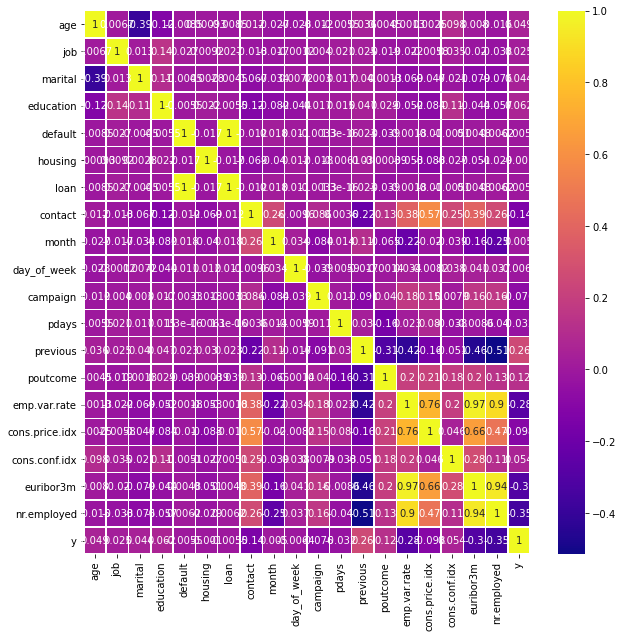

In [49]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='plasma',linewidths=0.5,ax=ax)

In [18]:
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [19]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

## Function to generate model report and plot auc_roc curve

In [20]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

In [21]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

## Model Train

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [24]:
X = df.drop(['y'],1)
y = df['y']

In [25]:
from sklearn.model_selection import train_test_split
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)b

In [51]:
print('X train Shape: ', X_train_im.shape)
print('Y train Shape: ', y_train_im.shape)
print('X test Shape: ', X_test_im.shape)
print('Y test Shape: ', y_test_im.shape)

X train Shape:  (2883, 19)
Y train Shape:  (2883,)
X test Shape:  (1236, 19)
Y test Shape:  (1236,)


## Logistics Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lg_clf=LogisticRegression(random_state=9)
lg_clf.fit(X_train_im, y_train_im)

score_lg_train=lg_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_lg_train)

score_lg_test=lg_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = lg_clf.predict(X_test_im)


Training score: 0.90 
Testing score: 0.90 


C:\Users\kelso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


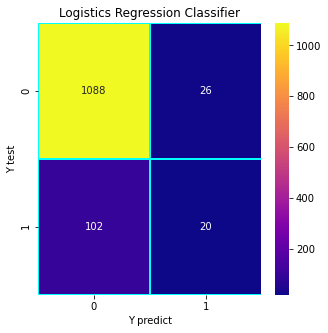

In [52]:
lg_clf = confusion_matrix(y_test_im, y_pred_lg)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lg_clf, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="plasma")
plt.title('Logistics Regression Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [99]:
lg_clf = accuracy_score(y_test_im, y_pred_lg)
print("Accuracy = {}".format(lg_clf))

Accuracy = 0.8964401294498382


In [98]:
lg_clf2 = precision_score(y_test_im, y_pred_lg)
print("Precision = {}".format(lg_clf2))

Precision = 0.43478260869565216


In [97]:
lg_clf3 = recall_score(y_test_im, y_pred_lg)
print("Recall = {}".format(lg_clf3))

Recall = 0.16393442622950818


In [96]:
lg_clf4 = f1_score(y_test_im, y_pred_lg)
print("F1 = {}".format(lg_clf4))

F1 = 0.23809523809523805


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=9, min_samples_leaf=100)
rf_clf.fit(X_train_im, y_train_im)

score_rf=rf_clf.score(X_train_im, y_train_im)
print("Training score: %.5f " % score_rf)

score_rf=rf_clf.score(X_test_im, y_test_im)
print("Testing score: %.5f " % score_rf)

y_pred_rf = rf_clf.predict(X_test_im)

Training score: 0.88588 
Testing score: 0.90129 


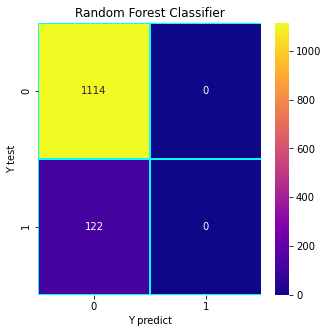

In [48]:
rf_clf = confusion_matrix(y_test_im, y_pred_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_clf, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="plasma")
plt.title('Random Forest Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [95]:
rf_clf = accuracy_score(y_test_im, y_pred_rf)
print("Accuracy = {}".format(rf_clf))

Accuracy = 0.901294498381877


In [94]:
rf_clf2 = precision_score(y_test_im, y_pred_rf)
print("Precision = {}".format(rf_clf2))

Precision = 0.0


C:\Users\kelso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
rf_clf3 = recall_score(y_test_im, y_pred_rf)
print("Recall = {}".format(rf_clf3))

Recall = 0.0


In [92]:
rf_clf4 = f1_score(y_test_im, y_pred_rf)
print("F1 = {}".format(rf_clf4))

F1 = 0.0


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtcla = DecisionTreeClassifier(random_state=0, min_samples_leaf=100)

dtcla.fit(X_train_im, y_train_im)
score_dt=dtcla.score(X_train_im, y_train_im)
print("Training score: %.4f " % score_dt)

score_dt=dtcla.score(X_train_im, y_train_im)
print("Training score: %.4f " % score_dt)

y_pred_dt = dtcla.predict(X_test_im)

Training score: 0.8949 
Training score: 0.8949 


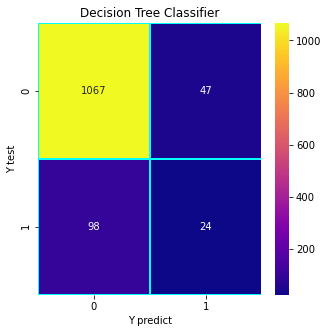

In [37]:
dtcla = confusion_matrix(y_test_im, y_pred_dt)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="plasma")
plt.title('Decision Tree Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [91]:
dtcla = accuracy_score(y_test_im, y_pred_dt)
print("Accuracy = {}".format(dtcla))

Accuracy = 0.8826860841423948


In [90]:
dtcla2 = precision_score(y_test_im, y_pred_dt)
print("Precision = {}".format(dtcla2))

Precision = 0.3380281690140845


In [89]:
dtcla3 = recall_score(y_test_im, y_pred_dt)
print("Recall = {}".format(dtcla3))

Recall = 0.19672131147540983


In [88]:
dtcla4 = f1_score(y_test_im, y_pred_dt)
print("F1 = {}".format(dtcla4))

F1 = 0.24870466321243523


## K-Nearest Neighbour

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
knc.fit(X_train_im, y_train_im)
y_pred_kn = knc.predict(X_test_im)

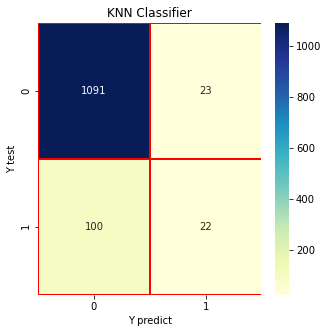

In [43]:
knc = confusion_matrix(y_test_im, y_pred_kn)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knc, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [103]:
knc = accuracy_score(y_test_im, y_pred_kn)
print("Accuracy = {}".format(knc))

Accuracy = 0.9004854368932039


In [102]:
knc2 = precision_score(y_test_im, y_pred_kn)
print("Precision = {}".format(knc2))

Precision = 0.4888888888888889


In [101]:
knc3 = recall_score(y_test_im, y_pred_kn)
print("Recall = {}".format(knc3))

Recall = 0.18032786885245902


In [100]:
knc4 = f1_score(y_test_im, y_pred_kn)
print("F1 = {}".format(knc4))

F1 = 0.2634730538922156


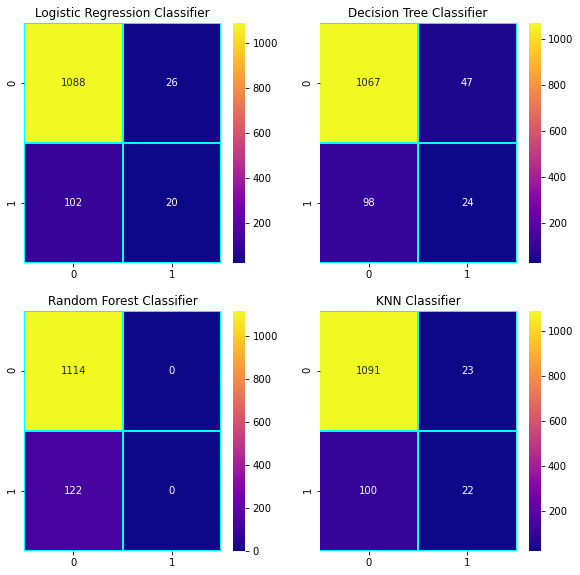

In [53]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classifier') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Decision Tree Classifier')
ax3 = fig.add_subplot(3, 3, 4)
ax3.set_title('Random Forest Classifier')
ax4 = fig.add_subplot(3, 3, 5)
ax4.set_title('KNN Classifier')
sns.heatmap(data=lg_clf, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax1)
sns.heatmap(data=dtcla, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax2)  
sns.heatmap(data=rf_clf, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax3)
sns.heatmap(data=knc, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax4)
plt.show()

In [87]:
Testscores = pd.Series([lg_clf, dtcla, rf_clf, knc],
                       index=['Logistic Regression Score','Decision Tree Score',
                              'Random Forest Score','K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score    0.896440
Decision Tree Score          0.248705
Random Forest Score          0.901294
K-Nearest Neighbour Score    0.263473
dtype: float64


In [104]:
Testscores2 = pd.Series([lg_clf2, dtcla2, rf_clf2, knc2],
                       index=['Logistic Regression Precision','Decision Tree Precision',
                              'Random Forest Precision','K-Nearest Neighbour Precision']) 
print(Testscores2)

Logistic Regression Precision    0.434783
Decision Tree Precision          0.338028
Random Forest Precision          0.000000
K-Nearest Neighbour Precision    0.488889
dtype: float64


In [105]:
Testscores3 = pd.Series([lg_clf3, dtcla3, rf_clf3, knc3],
                       index=['Logistic Regression Recall','Decision Tree Recall',
                              'Random Forest Recall','K-Nearest Neighbour Recall']) 
print(Testscores3)

Logistic Regression Recall    0.163934
Decision Tree Recall          0.196721
Random Forest Recall          0.000000
K-Nearest Neighbour Recall    0.180328
dtype: float64


In [106]:
Testscores4 = pd.Series([lg_clf4, dtcla4, rf_clf4, knc4],
                       index=['Logistic Regression F1','Decision Tree F1',
                              'Random Forest F1','K-Nearest Neighbour F1']) 
print(Testscores4)

Logistic Regression F1    0.238095
Decision Tree F1          0.248705
Random Forest F1          0.000000
K-Nearest Neighbour F1    0.263473
dtype: float64
